# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv", index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

## Taking in consideration only SRH VS DC matches

In [5]:
SD =matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Sunrisers Hyderabad'))]

In [6]:
SD.shape

(15, 14)

In [7]:
SD.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [8]:
SD.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,15.0,4.533333,10.370746,0.0,0.0,0.0,4.0,39.0
win_by_wickets,15.0,3.933333,3.348063,0.0,0.0,5.0,6.5,9.0


### HEAD TO HEAD

In [9]:
SD.groupby("winner")["winner"].count()

winner
Delhi Capitals         6
Sunrisers Hyderabad    9
Name: winner, dtype: int64

Text(0.5, 1.0, 'DC VS SRH-head to head')

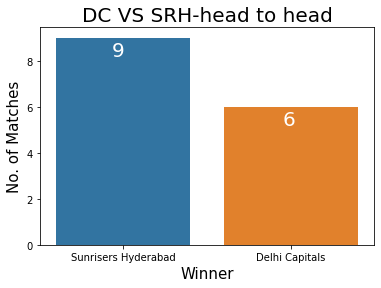

In [10]:
sns.countplot(SD["winner"])
plt.text(-0.07,8.2,str(SD['winner'].value_counts()['Sunrisers Hyderabad']),size=20,color='white')
plt.text(0.95,5.2,str(SD['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('DC VS SRH-head to head',fontsize = 20)

In [11]:
Season_wise_Match_Winner = pd.DataFrame(SD.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between SRH VS DC :")
Season_wise_Match_Winner

Season wise winner of matches between SRH VS DC :


winner count
season winner                           
2013   Sunrisers Hyderabad             2
2014   Sunrisers Hyderabad             2
2015   Delhi Capitals                  1
       Sunrisers Hyderabad             1
2016   Delhi Capitals                  2
2017   Delhi Capitals                  1
       Sunrisers Hyderabad             1
2018   Sunrisers Hyderabad             2
2019   Delhi Capitals                  2
       Sunrisers Hyderabad             1

### Winning Percentage

In [12]:
Winning_Percentage = SD['winner'].value_counts()/len(SD['winner'])

In [13]:
print("SRH winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against SRH(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

SRH winning percentage against DC(overall) : 60%
DC winning percentage against SRH(overall) : 40%


### Performance Analysis

In [14]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [15]:
performance("Sunrisers Hyderabad",SD)

Number of times given team win while defending : 3
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  8.0
Average wickets by which a given team wins while chasing :  6.0


In [16]:
performance("Delhi Capitals",SD)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  22.0
Average wickets by which a given team wins while chasing :  5.0


## Toss Analysis

In [17]:
Toss_Decision = pd.DataFrame(SD.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Delhi Capitals      bat                        5
                    field                      4
Sunrisers Hyderabad bat                        3
                    field                      3

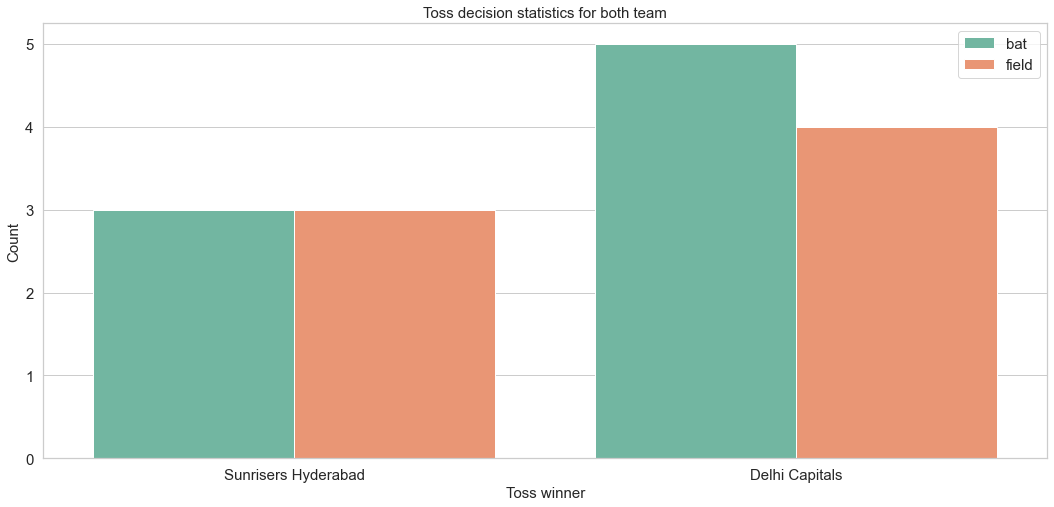

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(SD['toss_winner'],palette='Set2',hue=SD['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [19]:
Toss_Decision_based_Winner = pd.DataFrame(SD.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Delhi Capitals      bat           Delhi Capitals            1
                                  Sunrisers Hyderabad       4
                    field         Delhi Capitals            4
Sunrisers Hyderabad bat           Sunrisers Hyderabad       3
                    field         Delhi Capitals            1
                                  Sunrisers Hyderabad       2

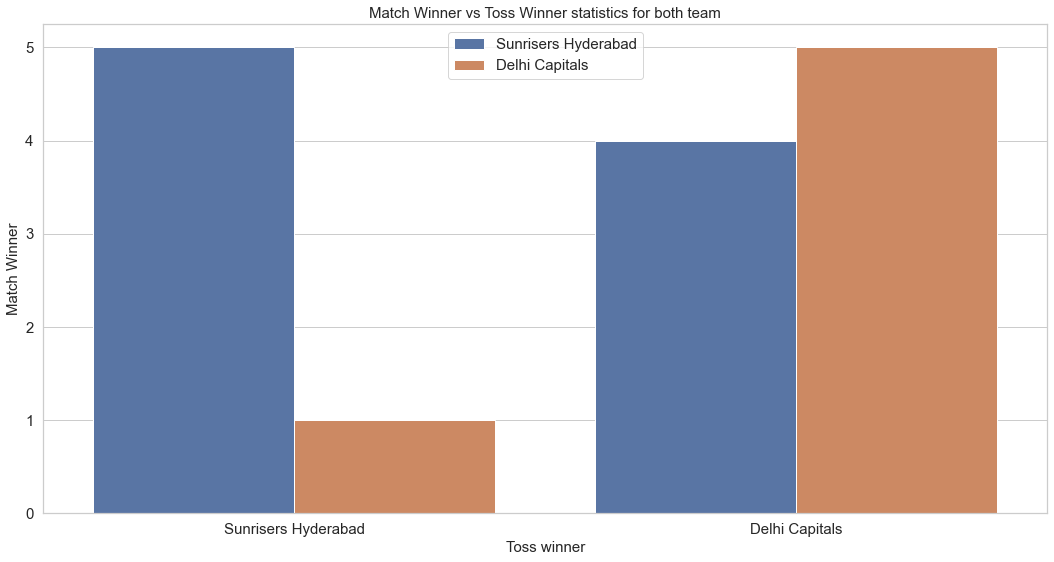

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SD['toss_winner'],hue=SD['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

From the above plot we can see the toss based winning pattern of both the teams, which shows that how important winning the toss have been for both team's match winning.

Also we can see that in clash of these two teams mostly chasing team has won the match , specifically SRH has won good percentage of matches while chasing.


### Toss Decision based Analysis of both the teams seperately :

In [21]:
SRH = SD[SD["toss_winner"]=="Sunrisers Hyderabad"]
DC = SD[SD["toss_winner"]=="Delhi Capitals"]

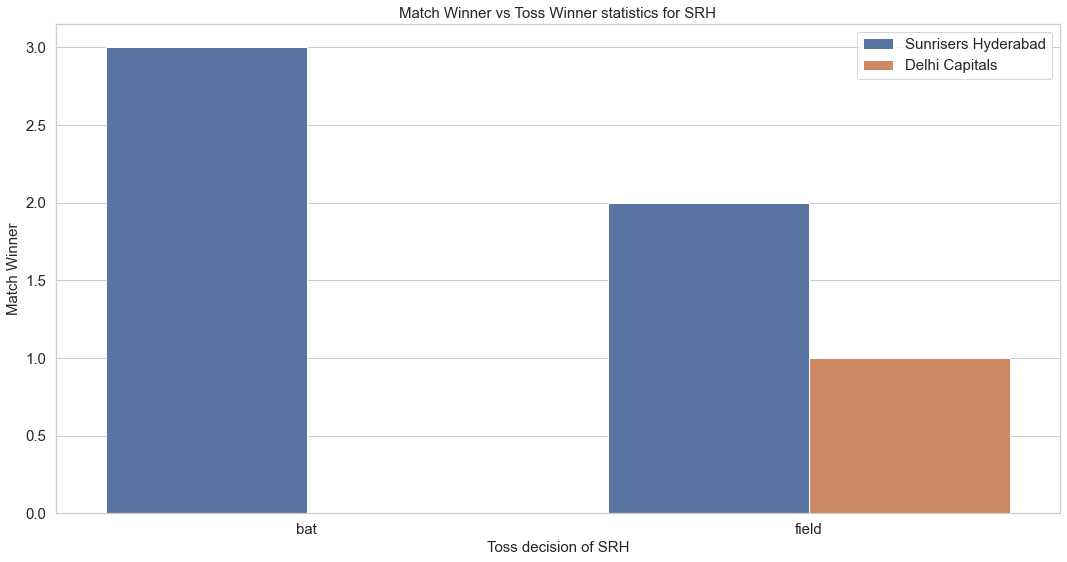

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SRH['toss_decision'],hue=SRH['winner'])
plt.title('Match Winner vs Toss Winner statistics for SRH',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of SRH',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

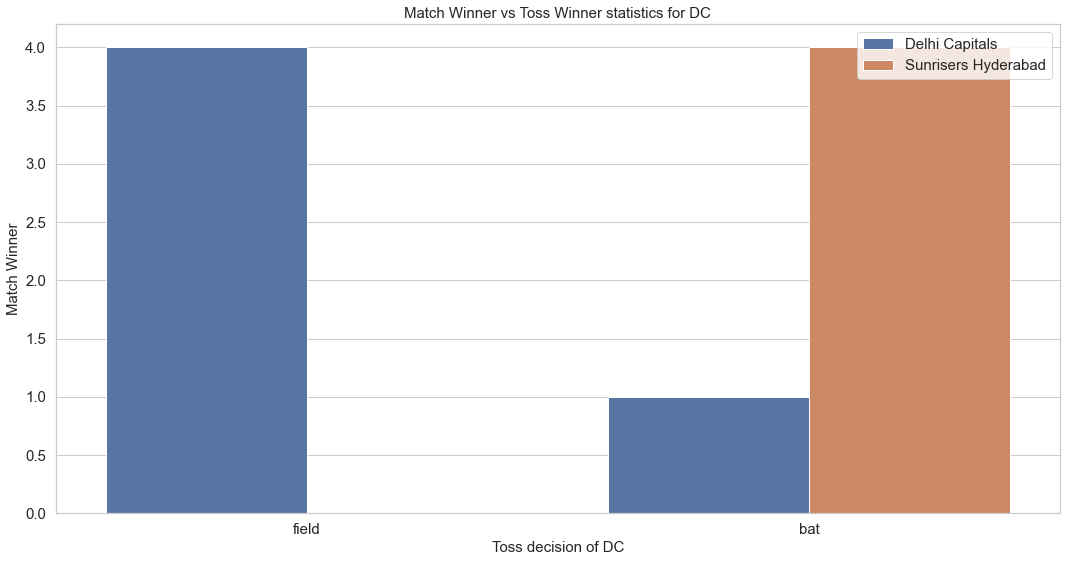

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of DC',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [24]:
player_of_the_match = pd.DataFrame(SD.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
DJG Sammy,1
JP Duminy,1
Rashid Khan,1
S Dhawan,1
Mohammed Shami,1
CH Morris,1
DW Steyn,1
RR Pant,1
MC Henriques,1
KS Williamson,1


## Recent Year Analysis

In [25]:
cond2 = SD["season"] == 2018
cond3 = SD["season"] == 2019
final = SD[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7929,2018,Hyderabad,05/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,7,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
7935,2018,Delhi,10/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,Feroz Shah Kotla
11152,2019,Delhi,04/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,J Bairstow,Feroz Shah Kotla Ground
11321,2019,Hyderabad,14/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,39,0,K Paul,Rajiv Gandhi Intl. Cricket Stadium
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium


In [26]:
final.shape

(5, 14)

In [27]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
RR Pant,1
K Paul,1
J Bairstow,1
Rashid Khan,1
S Dhawan,1


Text(0, 0.5, 'Win Count')

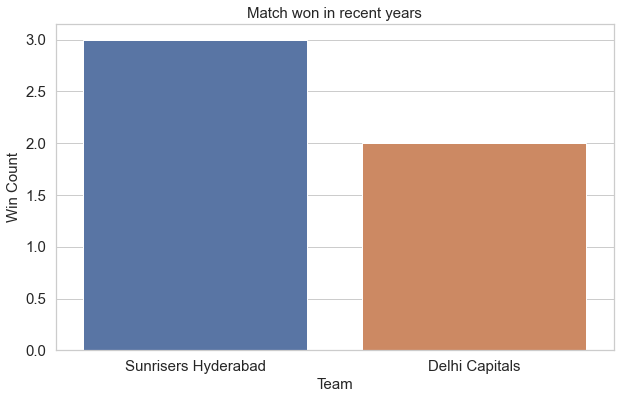

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

From all the above analysis related to Head to Head , Toss analysis, Performance Analysis, Recent year analysis etc we can predict that SRH has better chances to win the match ,specifically if they chase the first.